In [1]:
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector





In [2]:
## SETUP
# Protocol uses 3 qubits and 1 classical bit in a register
qr = QuantumRegister(3, name="q")    # Protocol uses 4 qubits
cr1 = ClassicalRegister(1, name="cr1") # and 2 classical bit
#cr2 = ClassicalRegister(1, name="cr2")
bit_flip_circuit = QuantumCircuit(qr,cr1)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

In [4]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:  
p = 0.25 # p stands for the probability of fliping the state of the qubit
psi = [np.sqrt(p), np.sqrt(1-p)]
init_gate = Initialize(psi) # initialize the superposition state
init_gate.label = "init"

In [5]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [6]:
"""
Er = QuantumCircuit(qr,cr1,name='Error simulator')
Er.append(init_gate, [3])
measure(Er, 3, 0)
Er.x(0).c_if(cr1, 0)
Er.append(init_gate, [3])
measure(Er, 3, 0)
Er.x(1).c_if(cr1, 0)
Er.append(init_gate, [3])
measure(Er, 3, 0)
Er.x(2).c_if(cr1, 0)


%matplotlib inline
Er.draw(output='mpl')
"""
def error_simulation(qc, q0, q1, q2, q3):
    
    #Creates error simulation using qubits q0 & q1 & q2 & q3
    qc.append(init_gate, [3]) # create the superposition state for |q3>
    measure(qc, 3, 0) # measure the state on |q3>
    qc.x(q0).c_if(cr1, 0) # apply x gate on q0 if |0> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.x(q1).c_if(cr1, 0) # apply x gate on q1 if |0> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.x(q2).c_if(cr1, 0) # apply x gate on q2 if |0> was measured by |q3>


In [7]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    qc.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

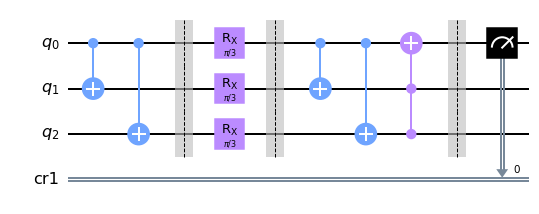

In [8]:
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
#bit_flip_circuit.append(Er,[0,1,2,3])
#error_simulation(bit_flip_circuit, 0, 1, 2, p)
bit_flip_circuit.barrier()

bit_flip_circuit.rx(np.pi/3,0)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.rx(np.pi/3,1)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.rx(np.pi/3,2)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.barrier()

# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

# step 4. measurement
measure(bit_flip_circuit, 0, 0)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

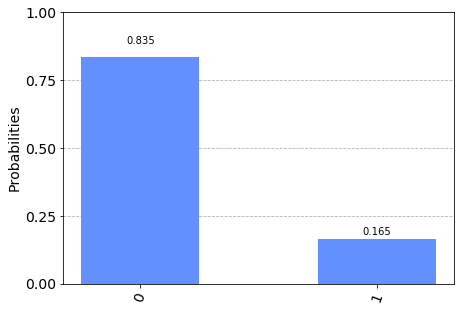

In [9]:

backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)

Which is higher than original probability 75% $(\cos^2(\pi/6))$